In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [2]:
#File reading
train_data = pd.read_table('a3-train.data', sep='\s+', header= None)
test_data = pd.read_table('a3-test.data', sep='\s+', header= None)
train_label = pd.read_table('a3-train.labels.txt', sep='\s+', header= None)
test_label = pd.read_table('a3-test.labels.txt', sep='\s+', header= None)
print(train_data.shape)
print(test_data.shape)
print(train_label.shape)
print(test_label.shape)

(2000, 500)
(600, 500)
(2000, 1)
(600, 1)


In [3]:
#Line1
#EDA phase
#Unique Identifier coloumns needs to be discarded
List_Of_unique_identifier_coloumns = []
No_Of_Unique_Values = []
for i in range(0,500,1):
    count_of_unique_values = train_data[i].nunique()
    No_Of_Unique_Values.append(count_of_unique_values)
    if(count_of_unique_values == 2000):
        List_Of_unique_identifier_coloumns.append(i)
    else:
        continue
List_Of_unique_identifier_coloumns

[]

In [4]:
#Line 2
#Are there any missing or weird values
print(train_data.isnull().values.sum())
print(train_data.isnull().sum())


0
0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
470    0
471    0
472    0
473    0
474    0
475    0
476    0
477    0
478    0
479    0
480    0
481    0
482    0
483    0
484    0
485    0
486    0
487    0
488    0
489    0
490    0
491    0
492    0
493    0
494    0
495    0
496    0
497    0
498    0
499    0
Length: 500, dtype: int64


Text(0.5,1,'Label Balancing')

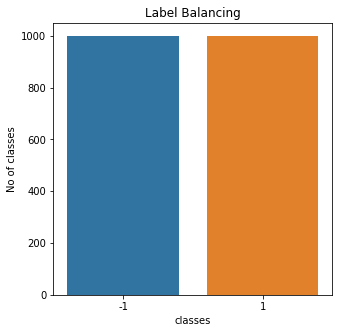

In [22]:
#Line 3
#Are the labels balanced
train_label[0].value_counts()
label_bal = train_label.groupby([0]).size()
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(label_bal.keys(), label_bal.values)
plt.xlabel("classes")
plt.ylabel("No of classes")
plt.title("Label Balancing")

In [6]:
#Line 4
desc_train_data = train_data.describe()
desc_train_data

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,481.722500,483.452500,510.166000,483.384500,501.612500,479.259000,480.109500,476.565000,486.793500,478.78900,...,482.458500,478.811500,486.356500,496.565500,493.49950,510.893000,478.219500,483.309000,507.977000,490.266000
std,6.421769,30.186294,38.899165,9.059895,41.389418,6.795956,40.575925,1.384461,15.043836,7.19092,...,20.890033,4.011735,23.967366,127.635442,34.81902,37.459353,5.880613,13.559847,37.224297,25.825273
min,462.000000,381.000000,370.000000,453.000000,371.000000,459.000000,334.000000,471.000000,430.000000,455.00000,...,407.000000,463.000000,391.000000,130.000000,368.00000,398.000000,457.000000,435.000000,363.000000,403.000000
25%,477.000000,464.000000,485.000000,477.000000,475.000000,475.000000,452.750000,476.000000,477.000000,474.00000,...,468.000000,476.000000,471.000000,404.000000,470.00000,486.000000,474.000000,474.000000,482.000000,473.000000
50%,482.000000,483.000000,510.500000,483.000000,500.000000,479.000000,480.000000,477.000000,487.000000,479.00000,...,482.000000,479.000000,486.000000,504.000000,492.00000,511.000000,478.000000,483.000000,508.000000,490.000000
75%,486.000000,503.000000,536.000000,490.000000,528.000000,484.000000,506.250000,477.000000,496.250000,484.00000,...,496.000000,481.000000,502.000000,586.000000,517.00000,535.000000,482.000000,492.000000,533.000000,507.250000
max,503.000000,600.000000,654.000000,519.000000,688.000000,505.000000,611.000000,481.000000,536.000000,503.00000,...,549.000000,497.000000,566.000000,920.000000,615.00000,661.000000,500.000000,535.000000,644.000000,583.000000


In [7]:
#Line 5
#Applying the Baseline Models
#Logistic regression:

#Copying the train and test values into x and y

x = train_data.copy()
x_test = test_data.copy()
y = train_label.copy()
y_test = test_label.copy()

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

log_reg = LogisticRegression()
log_reg.fit(x,y)
y_pred_train_log = log_reg.predict(x)
train_log_reg_score = metrics.accuracy_score(y,y_pred_train_log)
y_pred_test_log = log_reg.predict(x_test)
test_log_reg_score = metrics.accuracy_score(y_test,y_pred_test_log)
print("train Accuracy : ",train_log_reg_score*100,"%")
print("test Accuracy : ",test_log_reg_score*100,"%")

train Accuracy :  74.5 %
test Accuracy :  59.0 %


In [8]:
#Line 6
#K-NN:
from sklearn.neighbors import KNeighborsClassifier
knn_class = KNeighborsClassifier()
knn_class.fit(x,y)
y_pred_train_knn = knn_class.predict(x)
train_knn_score = metrics.accuracy_score(y,y_pred_train_knn)
print("train accuracy","#",train_knn_score*100,"%")
y_pred_test_knn = knn_class.predict(x_test)
test_knn_score = metrics.accuracy_score(y_test, y_pred_test_knn)
print("test accuracy","#",test_knn_score*100,"%")

train accuracy # 82.65 %
test accuracy # 69.16666666666667 %


In [9]:
#Line 7
#Decision Trees:
from sklearn import tree
dtree_class = tree.DecisionTreeClassifier()
dtree_class = dtree_class.fit(x,y)
y_pred_train_dtree = dtree_class.predict(x)
y_pred_test_dtree = dtree_class.predict(x_test)
train_score_dtree = metrics.accuracy_score(y,y_pred_train_dtree)
print("train accuracy",train_score_dtree*100,"%")
test_score_dtree = metrics.accuracy_score(y_test,y_pred_test_dtree)
print("test accuracy",test_score_dtree*100,"%")

train accuracy 100.0 %
test accuracy 76.33333333333333 %


In [10]:
#line 8
#Random Forests:
from sklearn.ensemble import RandomForestClassifier
rdf_class = RandomForestClassifier(n_estimators = 1000, random_state = 40, max_depth = 10)
rdf_class = rdf_class.fit(x,y)
y_pred_train_rdf = rdf_class.predict(x)
y_pred_test_rdf = rdf_class.predict(x_test)
train_score_rdf = metrics.accuracy_score(y,y_pred_train_rdf)
print("train accuracy",train_score_rdf*100,"%")
test_score_rdf = metrics.accuracy_score(y_test,y_pred_test_rdf)
print("test accuracy",test_score_rdf*100,"%")

train accuracy 100.0 %
test accuracy 74.0 %


Text(0.5,1,'Correlation of features')

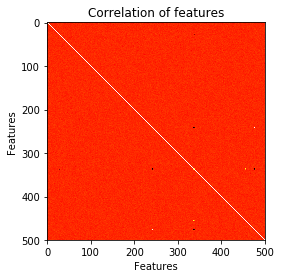

In [23]:
# Line 9
# Feature Engineering Phase1
#Calculate the correlation matrix
correlation_matrix = x.corr()
plt.imshow(correlation_matrix,cmap='hot',interpolation='nearest')
plt.xlabel("Features")
plt.ylabel("Features")
plt.title("Correlation of features")

In [12]:
#Line 9
#Feature Engineering Phase2
#Selection of Features using the Random Forests Feature_Importance model.

rdf_class_1 = RandomForestClassifier(n_estimators = 1000, random_state = 40, max_depth = 10)
rdf_class_1 = rdf_class.fit(x,y)
imp_Fea_Df = pd.DataFrame({'Feature':x.columns.tolist(),'Feature Importance': list(rdf_class_1.feature_importances_)})
imp_Features_list = imp_Fea_Df.sort_values('Feature Importance', ascending = False).nlargest(20,'Feature Importance')

drop_lis = []
for i in x.columns.values.tolist():
    if i not in imp_Features_list['Feature']:
        drop_lis.append(i)


x_feature_eng = x.copy()
x_test_feature_eng = x_test.copy()
x_feature_eng = x_feature_eng.drop(drop_lis, axis = 1)
x_test_feature_eng = x_test_feature_eng.drop(drop_lis, axis = 1)      

rdf_class_feature_eng = RandomForestClassifier(n_estimators = 1000, random_state = 22, max_depth = 10)    
rdf_class_feature_eng = rdf_class_feature_eng.fit(x_feature_eng,y)
y_pred_train_rdf_feature_eng = rdf_class_feature_eng.predict(x_feature_eng)
y_pred_test_rdf_feature_eng = rdf_class_feature_eng.predict(x_test_feature_eng)
train_score_rdf_feature_eng = metrics.accuracy_score(y,y_pred_train_rdf_feature_eng)
print("train accuracy",train_score_rdf_feature_eng*100,"%")
test_score_rdf_feature_eng = metrics.accuracy_score(y_test,y_pred_test_rdf_feature_eng)
print("test accuracy",test_score_rdf_feature_eng*100,"%")

train accuracy 98.9 %
test accuracy 88.5 %


train Accuracy :  c =  10.0 61.25000000000001 %
test Accuracy :  c =  10.0 58.833333333333336 %
train Accuracy :  c =  5.0 61.3 %
test Accuracy :  c =  5.0 58.833333333333336 %
train Accuracy :  c =  3.3333333333333335 61.3 %
test Accuracy :  c =  3.3333333333333335 58.833333333333336 %
train Accuracy :  c =  2.0 61.25000000000001 %
test Accuracy :  c =  2.0 58.833333333333336 %
train Accuracy :  c =  1.0 61.25000000000001 %
test Accuracy :  c =  1.0 58.833333333333336 %
train Accuracy :  c =  0.5 61.25000000000001 %
test Accuracy :  c =  0.5 59.0 %
train Accuracy :  c =  0.3333333333333333 61.25000000000001 %
test Accuracy :  c =  0.3333333333333333 58.833333333333336 %
train Accuracy :  c =  0.25 61.25000000000001 %
test Accuracy :  c =  0.25 58.833333333333336 %
train Accuracy :  c =  0.1 61.25000000000001 %
test Accuracy :  c =  0.1 59.0 %
train Accuracy :  c =  0.01 61.199999999999996 %
test Accuracy :  c =  0.01 59.5 %
train Accuracy :  c =  0.00980392156862745 61.199999999999996

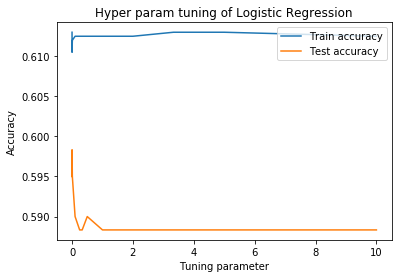

In [24]:
#Hyper param tuning of Logistic Regression
lamda = [0.1,0.2,0.3,0.5,1,2,3,4,10,100,102,103,1000,10000]
c = [1/h for h in lamda]
n=[]
m=[]
for i in c:
    log_reg = LogisticRegression(penalty='l2', C=i)
    log_reg.fit(x_feature_eng,y)
    y_pred_train_log = log_reg.predict(x_feature_eng)
    y_pred_test_log = log_reg.predict(x_test_feature_eng)
    train_log_reg_score = metrics.accuracy_score(y,y_pred_train_log)
    test_log_reg_score = metrics.accuracy_score(y_test,y_pred_test_log)
    print("train Accuracy : ","c = ",i,train_log_reg_score*100,"%")
    print("test Accuracy : ","c = ",i,test_log_reg_score*100,"%")
    n.append(train_log_reg_score)
    m.append(test_log_reg_score)
plt.plot(c,n, label="Train accuracy")
plt.plot(c,m, label="Test accuracy")
plt.xlabel("Tuning parameter")
plt.ylabel("Accuracy")
plt.title("Hyper param tuning of Logistic Regression")
plt.legend(loc = "upper right")

train accuracy # 1 100.0 %
test accuracy # 1 88.5 %
train accuracy # 2 93.75 %
test accuracy # 2 89.0 %
train accuracy # 3 93.89999999999999 %
test accuracy # 3 89.33333333333333 %
train accuracy # 4 92.0 %
test accuracy # 4 89.33333333333333 %
train accuracy # 5 92.30000000000001 %
test accuracy # 5 89.66666666666666 %
train accuracy # 6 91.4 %
test accuracy # 6 88.66666666666667 %
train accuracy # 7 91.55 %
test accuracy # 7 88.83333333333333 %
train accuracy # 8 90.7 %
test accuracy # 8 89.83333333333333 %
train accuracy # 9 90.8 %
test accuracy # 9 88.5 %
train accuracy # 10 90.35 %
test accuracy # 10 89.5 %
train accuracy # 11 90.8 %
test accuracy # 11 89.16666666666667 %
train accuracy # 12 90.25 %
test accuracy # 12 89.66666666666666 %
train accuracy # 13 90.10000000000001 %
test accuracy # 13 89.16666666666667 %
train accuracy # 14 89.5 %
test accuracy # 14 89.16666666666667 %


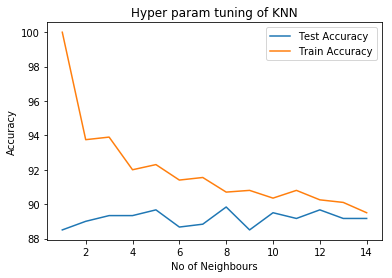

In [25]:
#Hyper param tuning of KNN:
from sklearn.neighbors import KNeighborsClassifier
no_of_neighbours = [i for i in range(1,15,1)]
u=[]
v=[]
v1=[]
for neighbour in no_of_neighbours:
    knn_class = KNeighborsClassifier(n_neighbors= neighbour)
    knn_class.fit(x_feature_eng,y)
    y_pred_train_knn = knn_class.predict(x_feature_eng)
    train_knn_score = metrics.accuracy_score(y,y_pred_train_knn)
    print("train accuracy","#",neighbour,train_knn_score*100,"%")
    y_pred_test_knn = knn_class.predict(x_test_feature_eng)
    test_knn_score = metrics.accuracy_score(y_test, y_pred_test_knn)
    print("test accuracy","#",neighbour,test_knn_score*100,"%")
    v.append(test_knn_score*100)
    v1.append(train_knn_score*100)
    u.append(neighbour)
plt.plot(u,v, label = "Test Accuracy")
plt.plot(u,v1, label = "Train Accuracy")
plt.xlabel("No of Neighbours")
plt.ylabel("Accuracy")
plt.title("Hyper param tuning of KNN")
plt.legend(loc = "upper right")

In [119]:
#Decision Tree with the Feature Engineered train set
from sklearn import tree
dtree_class = tree.DecisionTreeClassifier()
dtree_class = dtree_class.fit(x_feature_eng,y)
y_pred_train_dtree = dtree_class.predict(x_feature_eng)
y_pred_test_dtree = dtree_class.predict(x_test_feature_eng)
train_score_dtree = metrics.accuracy_score(y,y_pred_train_dtree)
print("train accuracy",train_score_dtree*100,"%")
test_score_dtree = metrics.accuracy_score(y_test,y_pred_test_dtree)
print("test accuracy",test_score_dtree*100,"%")

train accuracy 100.0 %
test accuracy 84.66666666666667 %


In [16]:
#Hyper parameter Tuning of Random Forest using Randomized Search

import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.grid_search import GridSearchCV 
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 11]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rdf = RandomForestClassifier()
rdf_random = RandomizedSearchCV(estimator = rdf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rdf_random.fit(x_feature_eng, y)
print(rdf_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   45.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.5min finished


{'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': False}


In [21]:
#Line 10
#This is the final Ensembled Model with top 20 features from the Feature Engineering phase2.
#Ensembling:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
clf1 = LogisticRegression(solver='lbfgs', multi_class='multinomial',random_state=1, C =0.01, penalty = "l2")
clf2 = RandomForestClassifier(n_estimators = 1000, min_samples_split = 2, min_samples_leaf = 2, max_features = 'sqrt', max_depth = 500, bootstrap= False)
clf3 = DecisionTreeClassifier(random_state=22, splitter= "best")
clf4 = KNeighborsClassifier(n_neighbors= 12)
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2),('dt', clf3),('knn',clf4)], voting='hard')
eclf = eclf.fit(x_feature_eng, y)
y_train_pred_ensemble = eclf.predict(x_feature_eng)
y_test_pred_ensemble = eclf.predict(x_test_feature_eng)
train_ensemble_score = metrics.accuracy_score(y,y_train_pred_ensemble)
test_ensemble_score = metrics.accuracy_score(y_test,y_test_pred_ensemble)
print("Train Accuracy of Final Ensembled Model",train_ensemble_score*100,"%")
print("Test Accuracy of Final Ensembled Model",test_ensemble_score*100,"%")

Train Accuracy of Final Ensembled Model 96.75 %
Test Accuracy of Final Ensembled Model 91.16666666666666 %


[(10, 95)]

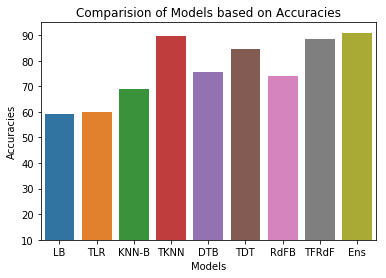

In [26]:
Accuracies = [59,59.8,69,89.66,75.5,84.66,74,88.5,91]
Models = ["LB","TLR","KNN-B","TKNN","DTB","TDT","RdFB","TFRdF","Ens"]
o = sns.barplot(Models,Accuracies)
o.set(xlabel="Models", ylabel="Accuracies", title="Comparision of Models based on Accuracies")
o.set(ylim=(10, 95))
